In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# ============ 1) Chargement des données ============

# -- A. Matrice PLM (présence (1)/absence(0)) --
path_plm = "data/matricePLM_genes.txt"
df_plm = pd.read_csv(path_plm, sep="\t", index_col=0)
df_plm

,WMCAATAATTRW_-317,TGTAAAGT_-280,CCAATGT_-275,GGATA_-263,TAACAAA_-261,HDTTAACAGAAWW_-260,AWTTAAWT_-239,RTTTTTR_-229,TATCCA_-226,GRWAAW_-212,...,SAGATCYRR_295,DYCACCGACAHH_312,GTGGWWHG_319,AGATCCAA_326,HYRGATCYRD_334,ATGTCGGYRR_344,YAGATCTR_353,CTGACY_367,ACNGCT_426,AGCAGC_444
AT5G09440,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
AT3G29320,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
AT5G59570,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
AT3G55830,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
AT3G16140,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT2G03670,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
AT3G12530,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
AT5G40780,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AT1G56280,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# -- B. Données d'expression (down (-1), no change (0), up (1))--
path_expr = "data/expression_final.csv"
df_expr = pd.read_csv(path_expr, index_col=0)
df_expr

,1101,1104,29,30,1977,1973,1980,1976,1978,1974,...,1563,796,797,799,800,798,801,1296,1677,1672
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
AT1G01010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
AT1G01030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AT1G01040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AT1G01050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AT1G01060,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT5G67550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AT5G67560,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
AT5G67590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Alignement des données
common_genes = df_plm.index.intersection(df_expr.index)
common_genes

Index(['AT5G09440', 'AT5G59570', 'AT3G16140', 'AT5G64430', 'AT5G47550',
       'AT3G52880', 'AT4G33980', 'AT1G53170', 'AT3G63060', 'AT1G27000',
       ...
       'AT5G22520', 'AT1G66660', 'AT3G26790', 'AT3G03980', 'AT1G24575',
       'AT3G18890', 'AT1G12220', 'AT2G03670', 'AT1G56280', 'AT2G03620'],
      dtype='object', length=10769)

In [5]:
# Filtrer les deux DataFrames par l'ensemble common_genes et trier dans le même ordre
df_plm = df_plm.loc[common_genes].sort_index()
df_expr = df_expr.loc[common_genes].sort_index()

In [6]:
df_plm

,WMCAATAATTRW_-317,TGTAAAGT_-280,CCAATGT_-275,GGATA_-263,TAACAAA_-261,HDTTAACAGAAWW_-260,AWTTAAWT_-239,RTTTTTR_-229,TATCCA_-226,GRWAAW_-212,...,SAGATCYRR_295,DYCACCGACAHH_312,GTGGWWHG_319,AGATCCAA_326,HYRGATCYRD_334,ATGTCGGYRR_344,YAGATCTR_353,CTGACY_367,ACNGCT_426,AGCAGC_444
AT1G01010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AT1G01030,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
AT1G01040,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
AT1G01050,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
AT1G01060,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT5G67550,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
AT5G67560,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
AT5G67590,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
AT5G67620,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [7]:
df_expr

,1101,1104,29,30,1977,1973,1980,1976,1978,1974,...,1563,796,797,799,800,798,801,1296,1677,1672
AT1G01010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
AT1G01030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AT1G01040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AT1G01050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AT1G01060,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT5G67550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AT5G67560,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
AT5G67590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AT5G67620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Conversion des données en tenseurs PyTorch
plm_matrix = torch.tensor(df_plm.values, dtype=torch.float32)
labels = torch.tensor(df_expr.values, dtype=torch.long)

In [9]:
plm_matrix

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 1., 0.],
        [0., 0., 0.,  ..., 1., 0., 1.],
        [0., 0., 0.,  ..., 0., 1., 0.]])

In [10]:
plm_matrix.unique()

tensor([0., 1.])

In [11]:
labels

tensor([[0, 0, 0,  ..., 1, 1, 1],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 1, 0, 0]])

In [12]:
labels.unique()

tensor([-1,  0,  1])

Distribution des classes dans df_plm:
0    1756957
1     159925
Name: count, dtype: int64


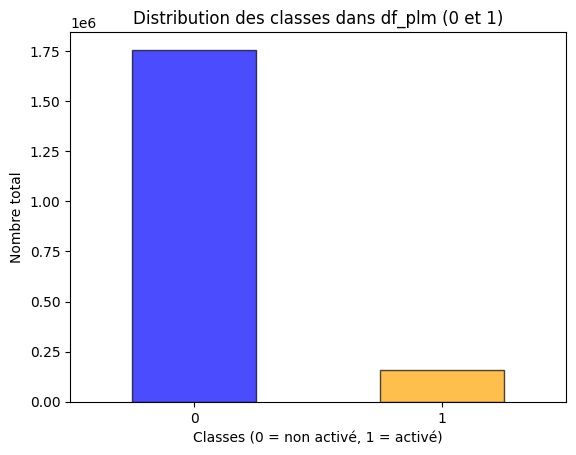

In [13]:
# Nombre de class 0 et 1 dans df_plm
plm_class_distribution = df_plm.stack().value_counts()

# Affichage des résultats
print("Distribution des classes dans df_plm:")
print(plm_class_distribution)

# Visualisation sous forme de bar plot
plm_class_distribution.plot(kind='bar', color=['blue', 'orange'], alpha=0.7, edgecolor='k')
plt.title("Distribution des classes dans df_plm (0 et 1)")
plt.xlabel("Classes (0 = non activé, 1 = activé)")
plt.ylabel("Nombre total")
plt.xticks(rotation=0)
plt.show()

Distribution des étiquettes dans df_expr:
 0.0    3886863
 1.0     145460
-1.0     135280
Name: count, dtype: int64


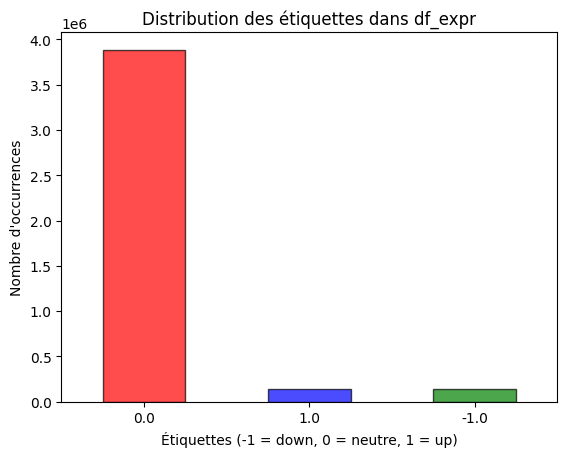

In [14]:
# Distribution des étiquettes (-1, 0, 1) dans toute la matrice
# Nous utilisons la méthode .stack() pour empiler les colonnes en lignes et compter les occurrences de chaque étiquette
label_distribution = df_expr.stack().value_counts()

# Affichage des résultats numériques
print("Distribution des étiquettes dans df_expr:")
print(label_distribution)

# Visualisation sous forme de bar plot
# Utilisation de couleurs distinctes pour chaque étiquette (-1 = rouge, 0 = bleu, 1 = vert)
label_distribution.plot(
    kind='bar',
    color=['red', 'blue', 'green'],  # Couleurs pour chaque classe
    alpha=0.7,  # Transparence pour une meilleure lisibilité
    edgecolor='k'  # Bordure noire pour les barres
)
plt.title("Distribution des étiquettes dans df_expr")  # Titre du graphique
plt.xlabel("Étiquettes (-1 = down, 0 = neutre, 1 = up)")  # Légende pour l'axe X
plt.ylabel("Nombre d'occurrences")  # Légende pour l'axe Y
plt.xticks(rotation=0)  # Orientation des étiquettes sur l'axe X (horizontal)
plt.show()


In [15]:
# Extraction des conditions de stress à partir des colonnes
stress_conditions = torch.arange(labels.size(1))  # Création d'un ID pour chaque condition de stress
stress_conditions

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
        140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 1

In [16]:
# ------------- 2) Création de la classe Dataset -------------
class GeneExpressionDataset(Dataset):
    """
    Each item corresponds to a (gene_index, stress_index),
    returning (plm_vector, stress_id, label).
    """
    def __init__(self, plm_matrix, stress_conditions, labels):
        self.plm_matrix = plm_matrix
        self.stress_conditions = stress_conditions
        self.labels = labels

        self.num_genes = plm_matrix.size(0)
        self.num_stress = stress_conditions.size(0)

    def __len__(self):
        # total samples = number of genes * number of stress conditions
        return self.num_genes * self.num_stress

    def __getitem__(self, idx):
        # figure out which gene and which stress condition
        gen_idx = idx // self.num_stress
        stress_idx = idx % self.num_stress

        # retrieve the row of PLM presence/absence for this gene
        plm_vector = self.plm_matrix[gen_idx]    # shape: [num_plms]
        # retrieve the ID of this stress condition
        stress_id = self.stress_conditions[stress_idx]
        # retrieve the expression class/label
        label = self.labels[gen_idx, stress_idx]

        return plm_vector, stress_id, label

In [17]:
class GeneExpressionModel(nn.Module):
    def __init__(self, num_plms, embedding_dim=16, hidden_dim=64, num_classes=3):
        """
        num_plms      : number of possible PLM 'vocab' indices (columns)
        embedding_dim : dimension of each PLM embedding
        hidden_dim    : hidden dimension for MLP
        num_classes   : how many classes to predict
        """
        super().__init__()

        # Embedding table for the PLMs, dimension: [num_plms, embedding_dim]
        self.plm_embedding = nn.Embedding(
            num_embeddings=num_plms,
            embedding_dim=embedding_dim
        )

        # Simple MLP
        self.mlp = nn.Sequential(
            nn.Linear(embedding_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, num_classes)
        )

    def forward(self, plm_indices_batch):
        """
        plm_indices_batch is a list of 1D LongTensors,
        each containing the active columns for a sample.
        We'll embed each list of indices, average them,
        then pass through the MLP.
        """
        plm_embedded_batch = []

        for indices in plm_indices_batch:
            # If no active PLM, we use a zero vector
            if indices.numel() == 0:
                # (embedding_dim,) but all zeros
                aggregated = torch.zeros(self.plm_embedding.embedding_dim,
                                         device=indices.device)
            else:
                # embedded shape: (num_active_indices, embedding_dim)
                embedded = self.plm_embedding(indices)
                # average over the 'num_active_indices' dimension
                aggregated = embedded.mean(dim=0)  # shape: (embedding_dim,)

            plm_embedded_batch.append(aggregated)

        # Stack into shape: (batch_size, embedding_dim)
        aggregated_plm = torch.stack(plm_embedded_batch, dim=0)

        # Pass through MLP -> (batch_size, num_classes)
        output = self.mlp(aggregated_plm)
        return output

In [18]:
# ------------- 4) Préparation pour l'entraînement -------------
# Hyperparamètres
batch_size = 16
num_epochs =10
learning_rate = 1e-4

# Create Dataset and DataLoader
dataset = GeneExpressionDataset(plm_matrix, stress_conditions, labels)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Number of PLMs = number of columns in plm_matrix
num_plms = plm_matrix.size(1)

# Initialize the model
model = GeneExpressionModel(num_plms, embedding_dim=16, hidden_dim=64, num_classes=3)

# Loss and optimizer
criterion = nn.CrossEntropyLoss(ignore_index=-1) # Problème !!! criterion n'accepte pas les valeurs négatives 
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [19]:
# ------------- 5) Boucle d'entraînement -------------
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0

    for plm_batch, stress_id_batch, label_batch in dataloader:
        optimizer.zero_grad()

        # Build list of active index tensors for each sample in this batch
        plm_indices_batch = []
        for plm_vec in plm_batch:  # each plm_vec shape: [num_plms]
            active_indices = (plm_vec > 0).nonzero(as_tuple=True)[0]
            plm_indices_batch.append(active_indices)

        # Forward pass
        outputs = model(plm_indices_batch)  # shape: (batch_size, num_classes)

        # Cross entropy expects shape (batch_size,) for labels
        loss = criterion(outputs, label_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss:.4f}")


Epoch 1/10, Loss: 41084.3065
Epoch 2/10, Loss: 40336.4341
Epoch 3/10, Loss: 40241.1569
Epoch 4/10, Loss: 40167.0945
Epoch 5/10, Loss: 40128.0548
Epoch 6/10, Loss: 40079.9913
Epoch 7/10, Loss: 40039.0011
Epoch 8/10, Loss: 39989.4116
Epoch 9/10, Loss: 39943.1831
Epoch 10/10, Loss: 39898.0439


In [20]:
# ------------- 6) Prédiction -------------
model.eval()
with torch.no_grad():
    # Example: predict for the 0th gene, for a single stress condition
    gene_id = 5
    plm_vector = plm_matrix[gene_id]  # shape: [num_plms]
    # Indices where presence > 0
    active_indices = (plm_vector > 0).nonzero(as_tuple=True)[0]

    # We wrap it in a list to make a "batch of size 1"
    output = model([active_indices])  # shape: (1, num_classes)
    predicted_class = torch.argmax(output, dim=1)

    print(f"Prediction for gene {gene_id}: Class {predicted_class.item()}")

Prediction for gene 5: Class 0
